In [91]:
import pandas as pd
import numpy as np

In [92]:
#reading house data
housing=pd.read_csv("/content/Housing.csv")

In [93]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [94]:
housing.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [95]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [96]:
# Converting object columns having yes and no value count with Yes and No values (Yes to 1 and No to 0)
housing['mainroad']=housing['mainroad'].map({'yes':1,'no':0})
housing['guestroom']=housing['guestroom'].map({'yes':1,'no':0})
housing['basement']=housing['basement'].map({'yes':1,'no':0})
housing['hotwaterheating']=housing['hotwaterheating'].map({'yes':1,'no':0})
housing['airconditioning']=housing['airconditioning'].map({'yes':1,'no':0})
housing['prefarea']=housing['prefarea'].map({'yes':1,'no':0})


In [97]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [98]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'])

#concat housing and status
housing = pd.concat([housing,status],axis=1)

#drop furnishingstatus columns from housing
housing.drop(['furnishingstatus'],axis=1,inplace=True)



In [99]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [100]:
housing['furnished']=housing['furnished'].map({True:1,False:0})
housing['semi-furnished']=housing['semi-furnished'].map({True:1,False:0})
housing['unfurnished']=housing['unfurnished'].map({True:1,False:0})

In [101]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [103]:
mean_price=housing['price'].mean()
sd_price=housing['price'].std()
housing['price']=(housing['price']-mean_price)/sd_price

In [105]:
mean_area=housing['area'].mean()
sd_area=housing['area'].std()
housing['area']=(housing['area']-mean_area)/sd_area

In [107]:
from numpy._core.fromnumeric import mean
mean  = housing['bedrooms'].mean()
sd = housing['bedrooms'].std()
housing['bedrooms'] = (housing['bedrooms'] - mean)/sd

In [109]:
mean_bath=housing['bathrooms'].mean()
sd_bath=housing['bathrooms'].std()
housing['bathrooms']=(housing['bathrooms']-mean_bath)/sd

In [110]:
mean_stories=housing['stories'].mean()
sd_stories=housing['stories'].std()
housing['stories']=(housing['stories']-mean_stories)/sd

In [111]:
mean_parking=housing['parking'].mean()
sd_parking=housing['parking'].std()
housing['parking']=(housing['parking']-mean_parking)/sd

In [112]:
mean_gym=housing['mainroad'].mean()
sd_gym=housing['mainroad'].std()
housing['mainroad']=(housing['mainroad']-mean_gym)/sd

In [113]:
mean_guest=housing['guestroom'].mean()
sd_guest=housing['guestroom'].std()
housing['guestroom']=(housing['guestroom']-mean_guest)/sd

In [114]:
mean_basement=housing['basement'].mean()
sd_basement=housing['basement'].std()
housing['basement']=(housing['basement']-mean_basement)/sd

In [108]:
mean_hot=housing['hotwaterheating'].mean()
sd_hot=housing['hotwaterheating'].std()
housing['hotwaterheating']=(housing['hotwaterheating']-mean_hot)/sd_hot

In [115]:
mean_air=housing['airconditioning'].mean()
sd_air=housing['airconditioning'].std()
housing['airconditioning']=(housing['airconditioning']-mean_air)/sd

In [117]:
mean_pre=housing['prefarea'].mean()
sd_pre=housing['prefarea'].std()
housing['prefarea']=(housing['prefarea']-mean_pre)/sd

In [118]:
mean_furn=housing['furnished'].mean()
sd_furn=housing['furnished'].std()
housing['furnished']=(housing['furnished']-mean_furn)/sd

In [119]:
mean_semi=housing['semi-furnished'].mean()
sd_semi=housing['semi-furnished'].std()
housing['semi-furnished']=(housing['semi-furnished']-mean_semi)/sd

In [120]:
mean_un=housing['unfurnished'].mean()
sd_un=housing['unfurnished'].std()
housing['unfurnished']=(housing['unfurnished']-mean_un)/sd

In [121]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,0.967073,1.618417,0.191426,-0.241147,-0.474835,-0.062151,0.927296,1.770066,1.036682,1.006850,-0.564333,-0.442517
1,4.000809,1.755397,1.402131,3.676865,2.973314,0.191426,-0.241147,-0.474835,-0.062151,0.927296,3.124963,-0.318214,1.006850,-0.564333,-0.442517
2,4.000809,2.216196,0.047235,0.967073,0.263521,0.191426,-0.241147,0.880061,-0.062151,-0.427600,1.770066,1.036682,-0.348047,0.790563,-0.442517
3,3.982096,1.082630,1.402131,0.967073,0.263521,0.191426,-0.241147,0.880061,-0.062151,0.927296,3.124963,1.036682,1.006850,-0.564333,-0.442517
4,3.551716,1.045766,1.402131,-0.387824,0.263521,0.191426,1.113750,0.880061,-0.062151,0.927296,1.770066,-0.318214,1.006850,-0.564333,-0.442517


In [124]:
# Assign feature variable X
X = housing.drop(['price'],axis=1)

# Assign response variable to y
y = housing['price']

In [125]:
# import seaborn and pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Magic matplotlib inline for visualise in the notebook
%matplotlib inline


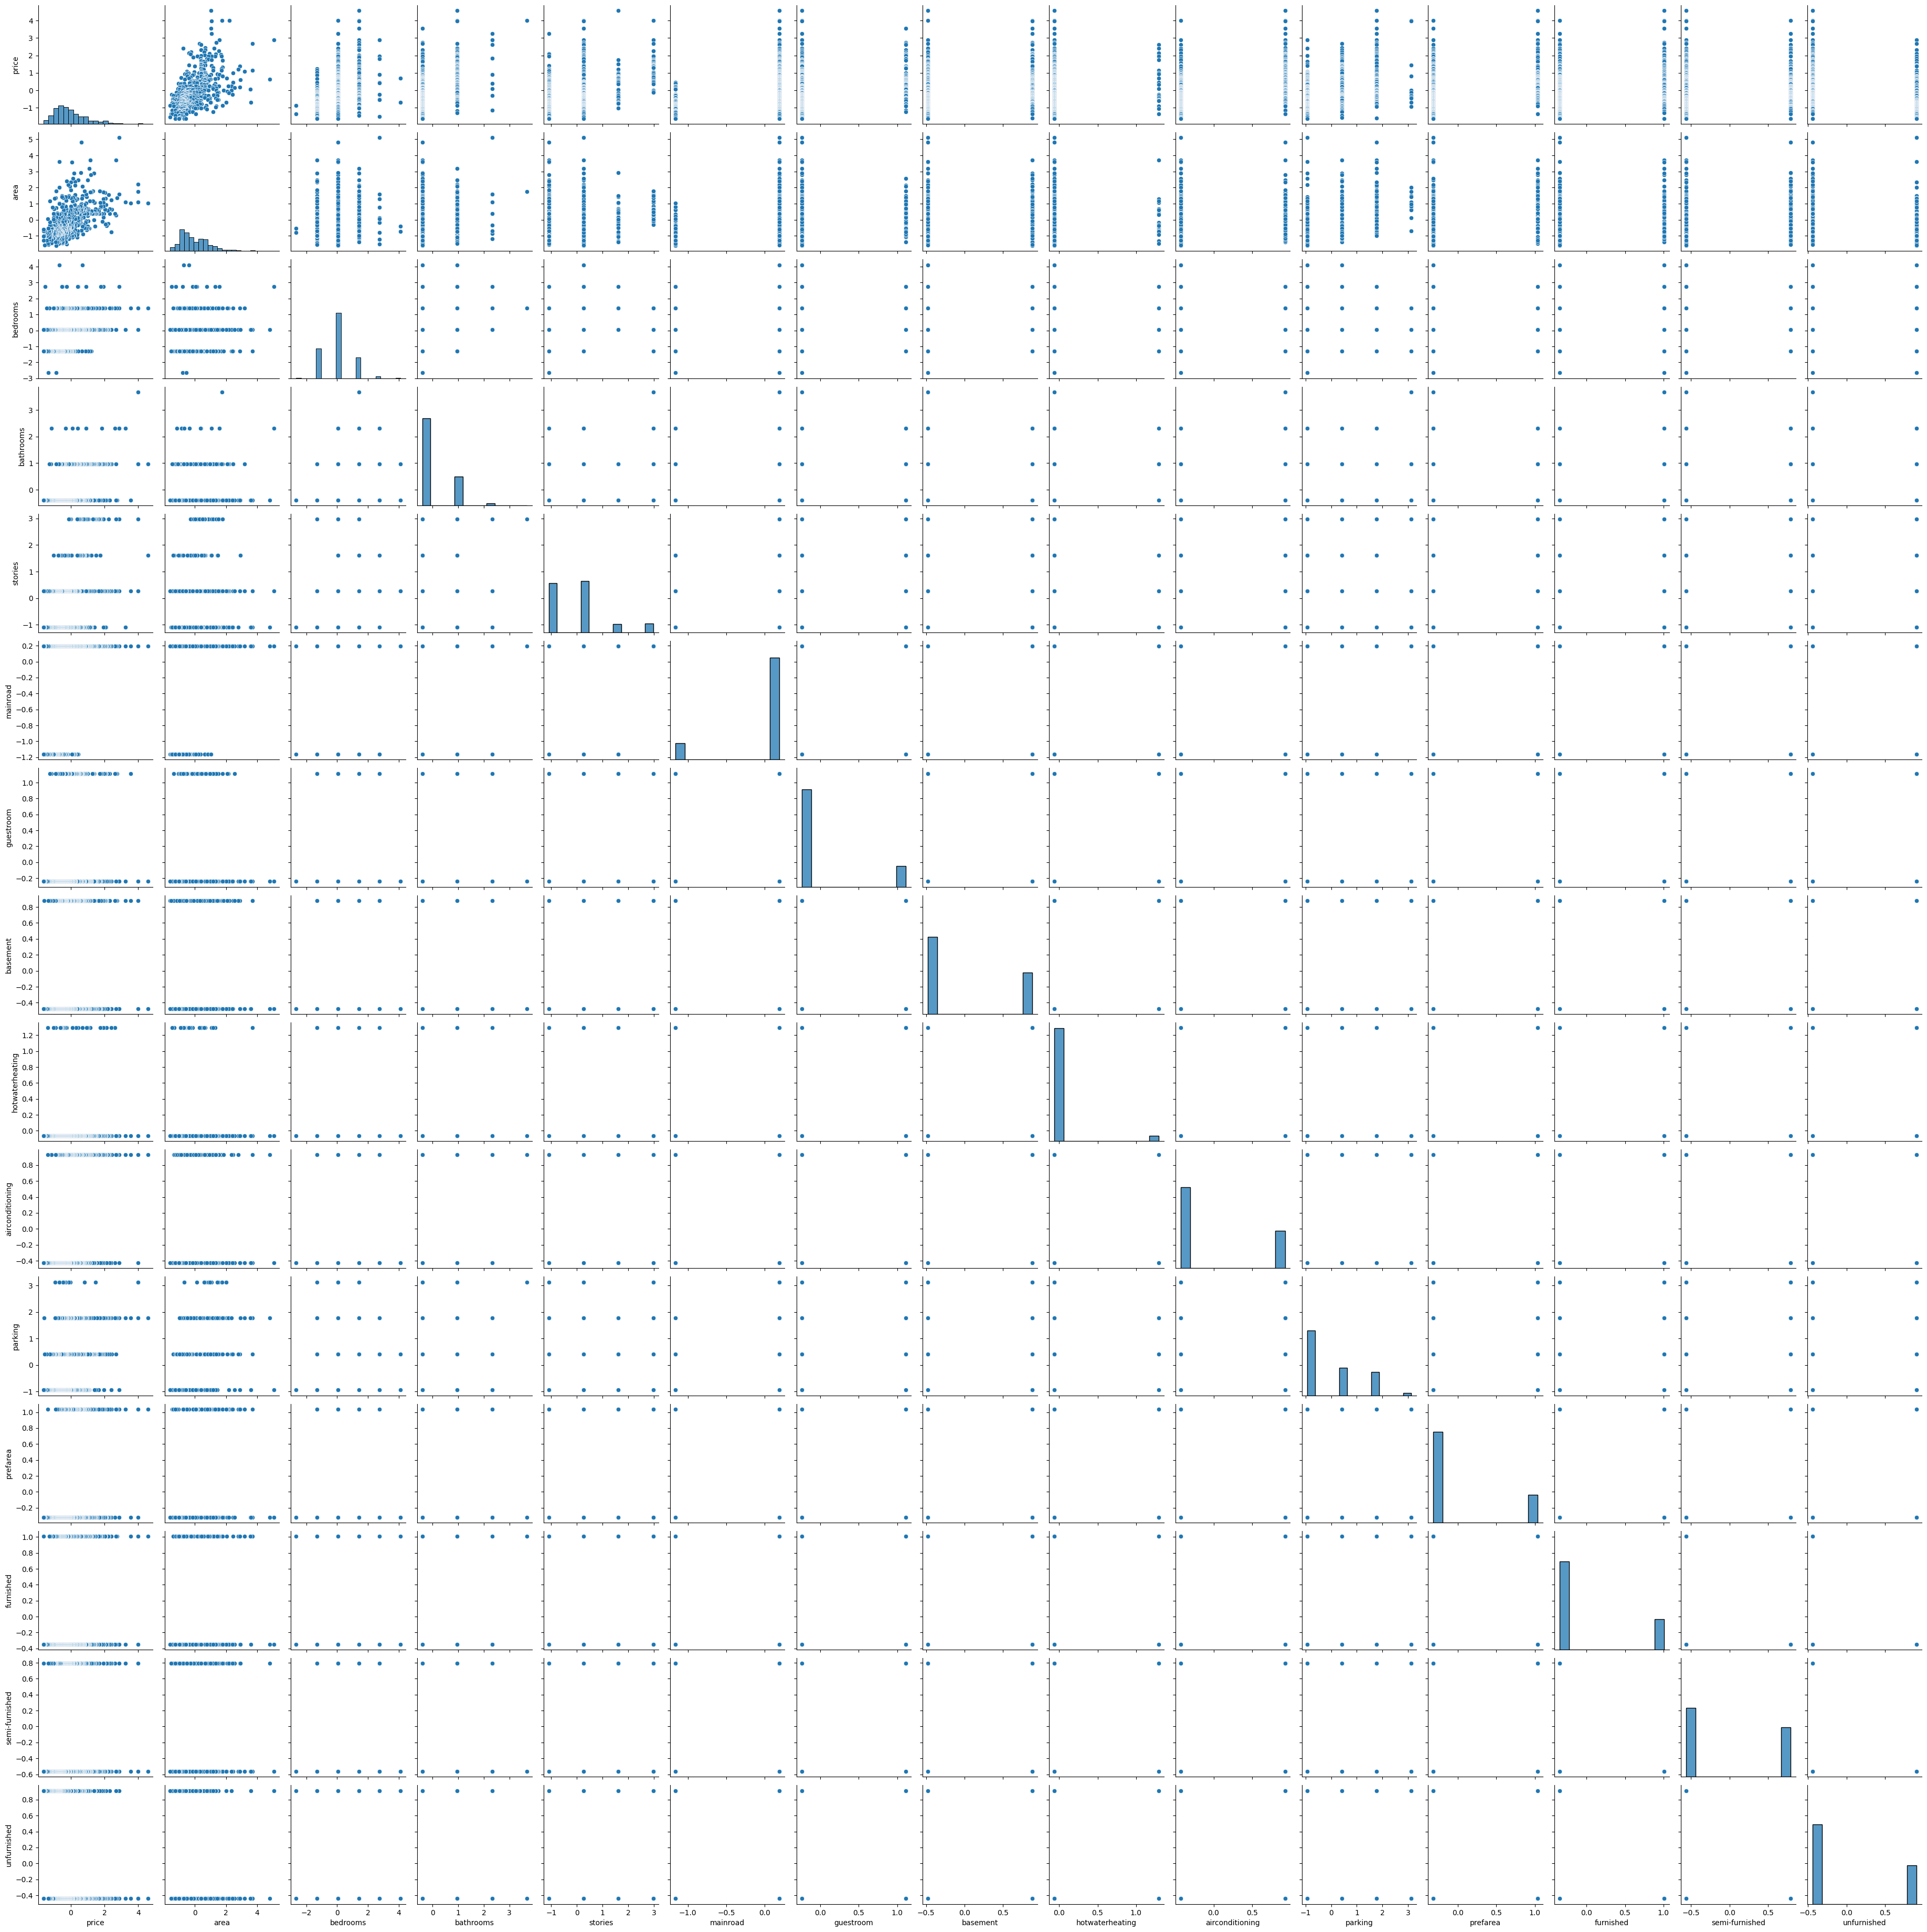

In [126]:
# Visualise the relationship between the features and the response using pairplots
sns.pairplot(housing)

In [ ]:
# Convert X and y into numpy arrays
X = np.array(X)

y = np.array(y)


In [129]:
# iterate over range of epochs
# Ensure X and y are NumPy arrays for consistent operations
X_np = np.array(X)
y_np = np.array(y)

# Initialize m as a vector of coefficients, one for each feature in X_np
m = np.zeros(X_np.shape[1]) # Initialize coefficients for each feature to 0
# Initialising c (intercept) as 0
c = 0

# The learning Rate (here using 0.01)
L = 0.01

# The number of iterations to perform gradient descent
epochs = 1000

# Number of elements in y_np
n = len(y_np)

# Create an empty dataframe gd_df with columns 'm_current', 'c_current' and 'cost'
gd_df = pd.DataFrame(columns=['m_current', 'c_current', 'cost'])

for i in range(epochs):
    # The current predicted value of Y (which is X @ m + c for multiple regression)
    Y_pred = np.dot(X_np, m) + c # Use dot product for matrix multiplication

    # Calculate cost (Mean Squared Error)
    cost = (1/n) * np.sum((y_np - Y_pred)**2)

    # Derivatives
    # Derivative w.r.t m (coefficients vector)
    D_m = (-2/n) * np.dot(X_np.T, (y_np - Y_pred))
    # Derivative w.r.t c (intercept scalar)
    D_c = (-2/n) * np.sum(y_np - Y_pred)

    # Update m and c
    m = m - L * D_m
    c = c - L * D_c

    # Store m (vector), c (scalar), and cost (scalar) in gd_df
    # m is a numpy array, convert to list for storing in DataFrame cell
    gd_df.loc[i] = [m.tolist(), c, cost]


In [130]:
# print gd_df
df = pd.DataFrame(gd_df)
print(df)

                                             m_current     c_current      cost
0    [0.010700277288193593, 0.007316431193430609, 0...  4.171994e-18  0.998165
1    [0.021002836575912457, 0.014266079248976937, 0...  6.257991e-18  0.950767
2    [0.0309232972487955, 0.020865177576500676, 0.0...  1.042999e-17  0.907107
3    [0.040476642390285276, 0.027129260834021788, 0...  1.460198e-17  0.866882
4    [0.04967724518923297, 0.03307319476340608, 0.0...  1.981697e-17  0.829810
..                                                 ...           ...       ...
995  [0.283662366031996, 0.04542204978255829, 0.391...  2.737871e-16  0.318081
996  [0.2836605119446023, 0.04542208316751669, 0.39...  2.735264e-16  0.318080
997  [0.2836586664033397, 0.045422116642458425, 0.3...  2.743086e-16  0.318078
998  [0.28365682936715747, 0.045422150198983345, 0....  2.743086e-16  0.318077
999  [0.28365500079521516, 0.045422183828797036, 0....  2.745694e-16  0.318075

[1000 rows x 3 columns]


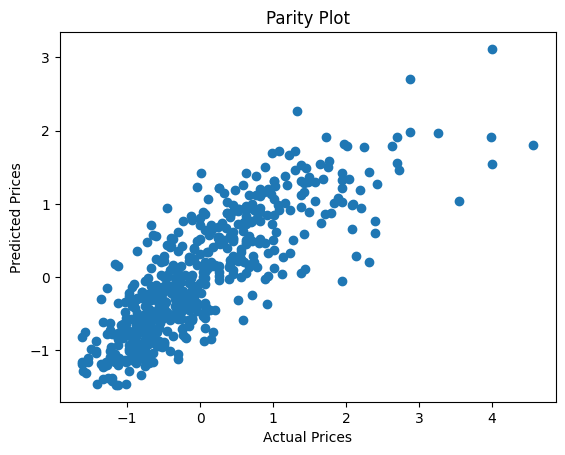

In [132]:
# Making predictions
Y_pred = np.dot(X_np, m) + c

# Plotting parity plot as shown
plt.scatter(y_np, Y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Parity Plot')
plt.show()





Text(0, 0.5, 'Cost')

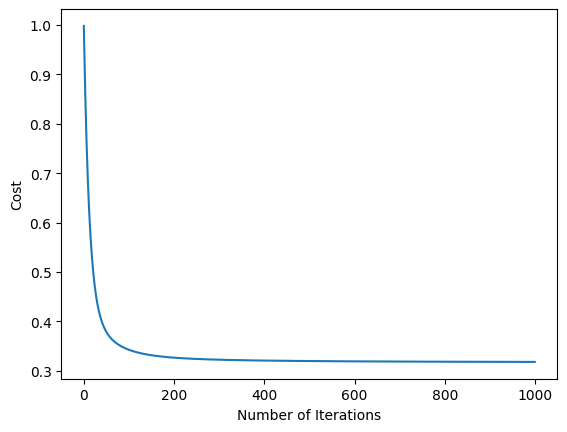

In [133]:
# plotting cost against num_iterations
plt.plot(gd_df['cost'])
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')

In [134]:
# print final m and c value
print(m)
print(c)



[ 0.283655    0.04542218  0.39156037  0.17933867  0.1633261   0.11893407
  0.13950785  0.26063219  0.33356426  0.1111498   0.25399448  0.06067745
  0.042873   -0.10355045]
2.74569358075371e-16


In [ ]:
# Assigning feature variable X (with area and bedroom)
X = housing[['area','bedrooms']]

# Assigning response variable y (price)
y = housing['price']

In [135]:
# Add a column of ones as intercept
X['intercept'] = 1

#reindex columns in sequence:- 'intercept','area' and 'bedrooms'
X = X[['intercept','area','bedrooms']]

#print head of X
X.head()

,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [136]:
# Convert X and y to numpy arrays
X = np.array(X)

y = np.array(y)


In [137]:
# initiate theta values with array of zeroes equal to number of columns present in X
theta = np.zeros(X.shape[1])

In [138]:
# def theta_cost(X,y, theta):

#     cost=np.sum(np.square(np.matmul(X, theta) - y)) / (2 * m)
#     return cost
def theta_cost(X, y, theta):
    m = len(y)
    cost = np.sum(np.square(np.dot(X, theta) - y)) / (2 * m)
    return cost

In [140]:
alpha = 0.1

#intialise iterations to 1000
iterations = 1000

# Number of samples
m_samples = len(y)

# Re-initialize gd_df with appropriate columns for this run
gd_df = pd.DataFrame(columns=['theta_current', 'cost'])

# iterate over number of iterations
for i in range(iterations):
    #calculate the derivative of each theta value/ coefficients
    gradient = np.dot(X.T, np.dot(X, theta) - y) / m_samples

    #update the theta value according to the formula after differentiation
    theta = theta - alpha * gradient

    #calculate the hypothesis by multiplying X with theta values (Hint: Use numpy matmul())
    h= np.dot(X,theta)

    #calculate cost function
    cost = theta_cost(X, y, theta)

    #append rows in gdm_df with updated theta and cost value
    gd_df.loc[i] = [theta.tolist(), cost]



# print gdm_df
print(gd_df)

                                         theta_current      cost
0    [-2.281559243266377e-18, 0.05350138644096797, ...  0.459469
1    [3.418264651965161e-17, 0.10110793924865444, 0...  0.428366
2    [5.695749682297133e-17, 0.1434757023151709, 0....  0.403942
3    [7.190985829223491e-17, 0.18118712929139588, 0...  0.384758
4    [7.826563046990553e-17, 0.21475938897922056, 0...  0.369688
..                                                 ...       ...
995  [2.770057374101447e-16, 0.4916807680678394, 0....  0.314176
996  [2.7896135961865877e-16, 0.4916807680678394, 0...  0.314176
997  [2.770057374101447e-16, 0.4916807680678394, 0....  0.314176
998  [2.7896135961865877e-16, 0.4916807680678394, 0...  0.314176
999  [2.770057374101447e-16, 0.4916807680678394, 0....  0.314176

[1000 rows x 2 columns]


Text(0, 0.5, 'Cost')

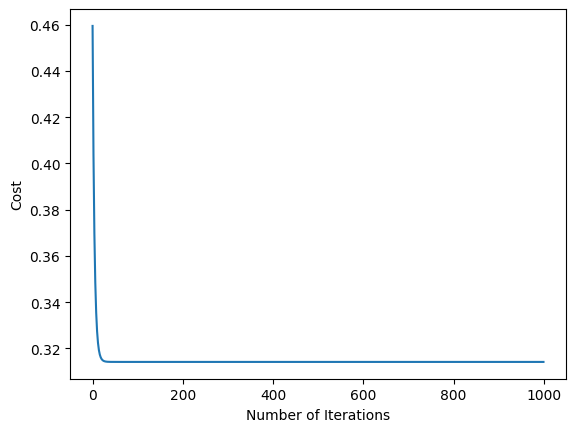

In [141]:
# plotting cost against num_iterations
plt.plot(gd_df['cost'])
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
